In [2]:
import pandas as pd
import numpy as np
import os
import gc
#os.chdir("/maps/hdir/mgd405")

In [2]:
!python 00extract_authorids_from_paperids.py

Starting...
(11736, 3)
13 Finished.
No more data


In [ ]:
!python 01extract_paperids_from_authorids.py

Starting...
(29454, 1)
1 Finished.


In [ ]:
!python 02extract_journalids_from_paperids.py

In [13]:
!python 03extract_paperids_from_journalids.py

Starting...
(37486, 1)
(5129, 1)
3 Finished.
4 Finished.
5 Finished.
6 Finished.
7 Finished.
8 Finished.
9 Finished.
10 Finished.
11 Finished.
12 Finished.
No more data


In [50]:
!python 04extract_citations_from_paperids.py

Starting...
(53446998, 1)
1 Finished.
2 Finished.
3 Finished.
4 Finished.
5 Finished.
6 Finished.
7 Finished.
8 Finished.
9 Finished.
10 Finished.
11 Finished.
12 Finished.
13 Finished.
14 Finished.
15 Finished.
16 Finished.
17 Finished.
18 Finished.
19 Finished.
20 Finished.
21 Finished.
22 Finished.
23 Finished.
24 Finished.
25 Finished.
26 Finished.
27 Finished.
28 Finished.
29 Finished.
30 Finished.
31 Finished.
32 Finished.
No more data


In [7]:
!python 05extract_journalcitations_from_papercitations.py

Starting...
Total publications 53446998
chunck start
139841564  citations
chunck start
220566866  citations
chunck start
153200090  citations
chunck start
154951765  citations
Finished.


In [661]:
!python 10author_publication_sequence.py

Starting...
num of publications: (973472, 30)
num of publications with authors: (1619266, 6)
Finished.


In [664]:
!python affiliation_from_affiliationIds.py

Starting...
1 Finished.
No more data


In [23]:
print('Starting...')

# get all paperids
ls=glob.glob('../../../data/author_journal*')
pubs=pd.concat([pd.read_pickle(i) for i in ls]).dropna(subset=['JournalId']).reset_index(drop=True)
pubs['VenueId']=pubs.JournalId
pubs['Type']='Journal'
pubs_1=pd.concat([pd.read_pickle(i) for i in ls]).dropna(subset=['ConferenceSeriesId']).reset_index(drop=True)
pubs_1['VenueId']=pubs_1.ConferenceSeriesId
pubs_1['Type']='Conference'
pub=pd.concat([pubs,pubs_1])
pub=pub[~pub.Year.isna() | ~pub.PaperId.isna() | ~pub.PaperTitle.isna() |~pub.AuthorId.isna() ].reset_index(drop=True)
print('num of publications:', pub.shape)
pub['Date'] = pd.to_datetime(pub['Date'])
pub=pub.sort_values(by=['Date'])

# merge with all authors 
pub_1=pub[['PaperId', 'AffiliationId',  'OriginalAffiliation', 'Rank', 'DOI', 'DocType',
       'PaperTitle', 'OriginalTitle', 'BookTitle', 'Year', 'Date', 'Publisher',
       'JournalId', 'ConferenceSeriesId', 'ConferenceInstanceId', 'Volume',
       'Issue', 'FirstPage', 'LastPage', 'ReferenceCount', 'CitationCount',
       'EstimatedCitation', 'OriginalVenue', 'FamilyId', 'CreatedDate',
       'VenueId', 'Type']]

ls=glob.glob('../../../data/author_paper*')
papers=pd.concat([pd.read_pickle(i) for i in ls]).reset_index(drop=True)

print('num of publications with authors:', papers.shape)



Starting...
num of publications: (973472, 30)
num of publications with authors: (1619266, 6)


In [38]:
pub_2=pub_1.merge(papers[['AuthorId','PaperId','AuthorSequenceNumber','OriginalAuthor']], on=['PaperId'])

# filter by #publications and year
pub_2.Year=pub_2.Year.astype(float)
pub_2=pub_2[pub_2.Year>1959]

#pub_2=pub_2[pub_2.groupby("AuthorId")['AuthorId'].transform('size') > 1].reset_index(drop=True)

pub_2.VenueId=pub_2.VenueId.astype(float)
pub_2.VenueId=pub_2.VenueId.astype(int)

In [39]:
journal_sequence=pub_2.drop_duplicates("PaperId").copy()
journal_sequence.Year=journal_sequence.Year.astype(str)
journal_sequence['Year']= journal_sequence['Year'].apply(lambda x: x.replace('2020','2019'))
journal_sequence.Year=journal_sequence.Year.astype(float)
journal_sequence=journal_sequence.dropna(subset=['Year'])
journal_sequence.Year=journal_sequence.Year.astype(int)

In [40]:
values=journal_sequence[journal_sequence.DocType=='Journal'].groupby('Year').count().reset_index()['PaperId'].values
values_1=journal_sequence[journal_sequence.DocType=='Conference'].groupby('Year').count().reset_index()['PaperId'].values
year=journal_sequence[journal_sequence.DocType=='Journal'].groupby('Year').count().reset_index().Year.values
year_1=journal_sequence[journal_sequence.DocType=='Conference'].groupby('Year').count().reset_index().Year.values
cumulative = np.cumsum(values)
cumulative_1 = np.cumsum(values_1)

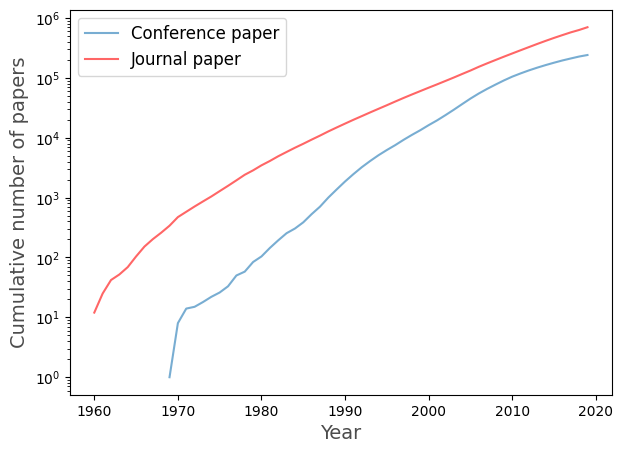

In [41]:
import matplotlib.pyplot as plt
fig, ax= plt.subplots(figsize=(7,5))

ax.plot(year_1, cumulative_1, label='Conference paper',alpha=0.6)
ax.plot(year, cumulative,label='Journal paper',  color='red', alpha=0.6)
ax.set( yscale='log')
ax.set_xlabel('Year', size = 14,alpha=0.7)
ax.set_ylabel('Cumulative number of papers', size = 14,alpha=0.7)
plt.legend(fontsize=12)
plt.show()

In [42]:
sequences=pd.read_pickle('../../../data/author_sequence.pickle')

In [43]:
def to_list(df, columns):
    for i in columns:
        df[i]=df[i].apply(lambda x: x.split('; '))
    return df

sequences=to_list(sequences,['Year','VenueId','PaperId','PaperTitle','CitationCount'])
df_1=sequences.explode('CitationCount').reset_index(drop=True)
df_1['CitationCount']=df_1['CitationCount'].apply(lambda x: float(eval(x)))
count=df_1.groupby('CitationCount').count()

In [44]:
from collections import Counter
count=np.sort(df_1['CitationCount'].values)
ws = Counter(count)
count=list(set(count))
fre=[ws[i] for i in count]

Text(0, 0.5, 'Frequency')

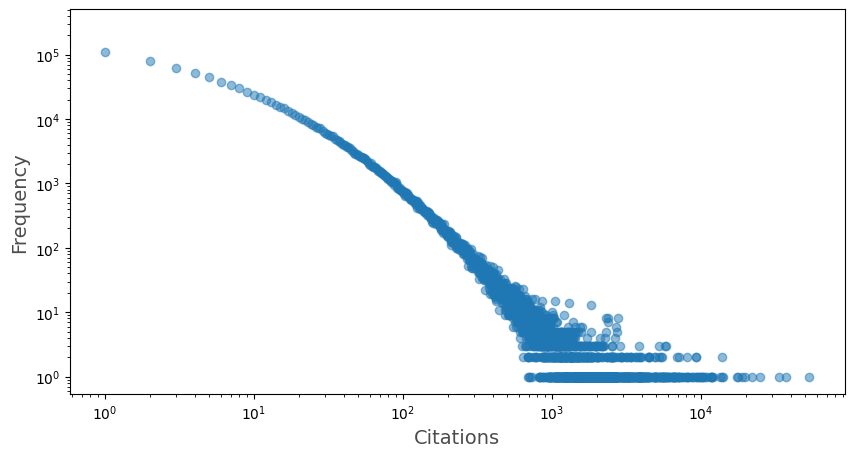

In [45]:
import matplotlib.pyplot as plt
fig, ax= plt.subplots(1,1, figsize=(10,5))
ax.plot(count, fre, 'o', color='tab:blue',alpha = 0.5)
#ax.plot(count, func_powerlaw(count, *popt), alpha = 0.2)
ax.set( xscale='log',yscale='log')
ax.set_xlabel('Citations', size = 14,alpha=0.7)
ax.set_ylabel('Frequency', size = 14,alpha=0.7)
#ax.set_ylim(0,10e3)

In [37]:
journal_sequence=pub_2.copy()
count=journal_sequence.groupby('AuthorId').count().PaperId.values
journal_1=journal_sequence.drop_duplicates(subset=['PaperId'])
count_1=journal_1.groupby('VenueId').count().PaperId.values
ws = Counter(count)
fre=[ws[i] for i in count]
ws_1 = Counter(count_1)
fre_1=[ws_1[i] for i in count_1]


/home/unicph.domain/mgd405/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  


Text(0, 0.5, 'Frequency')

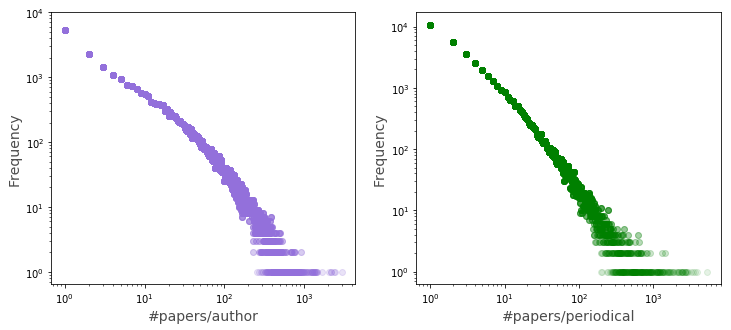

In [52]:
fig, ax= plt.subplots(1,2, figsize=(12,5))
ax[0].plot(count, fre, 'o', color='mediumpurple',alpha = 0.2)
ax[0].set( xscale='log',yscale='log')
ax[0].set_xlabel('#papers/author', size = 14,alpha=0.7)
ax[0].set_ylabel('Frequency', size = 14,alpha=0.7)
ax[0].set_ylim(0,10e3)

ax[1].plot(count_1, fre_1, 'o', color='green',alpha = 0.1)
ax[1].set( xscale='log',yscale='log')
ax[1].set_xlabel('#papers/periodical', size = 14,alpha=0.7)
ax[1].set_ylabel('Frequency', size = 14,alpha=0.7)
#ax[1].set_ylim(0,10e3)
